In [1]:
library(Seurat)
library(SeuratObject)
library(harmony)
library(dplyr)
library(patchwork)
library(cowplot)
library(sctransform)
library(ggplot2)
library(DoubletFinder)
library(fields)
library(parallel)
library(remotes)
library(SeuratDisk)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Rcpp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.

In [2]:
Clusters <- readRDS('KJ_Clusters.rds')

In [3]:
levels(Clusters)

[1] "Monocytes"              "B_Cells"                "Monocytes&Granulocytes"
 [4] "Macrophages&Monocytes"  "Macrophages"            "Dendritic_Cells"       
 [7] "T_NK_Cells"             "Granulocytes"           "Fibroblasts"           
[10] "SMC"                    "Endothelial"            "Unknown"

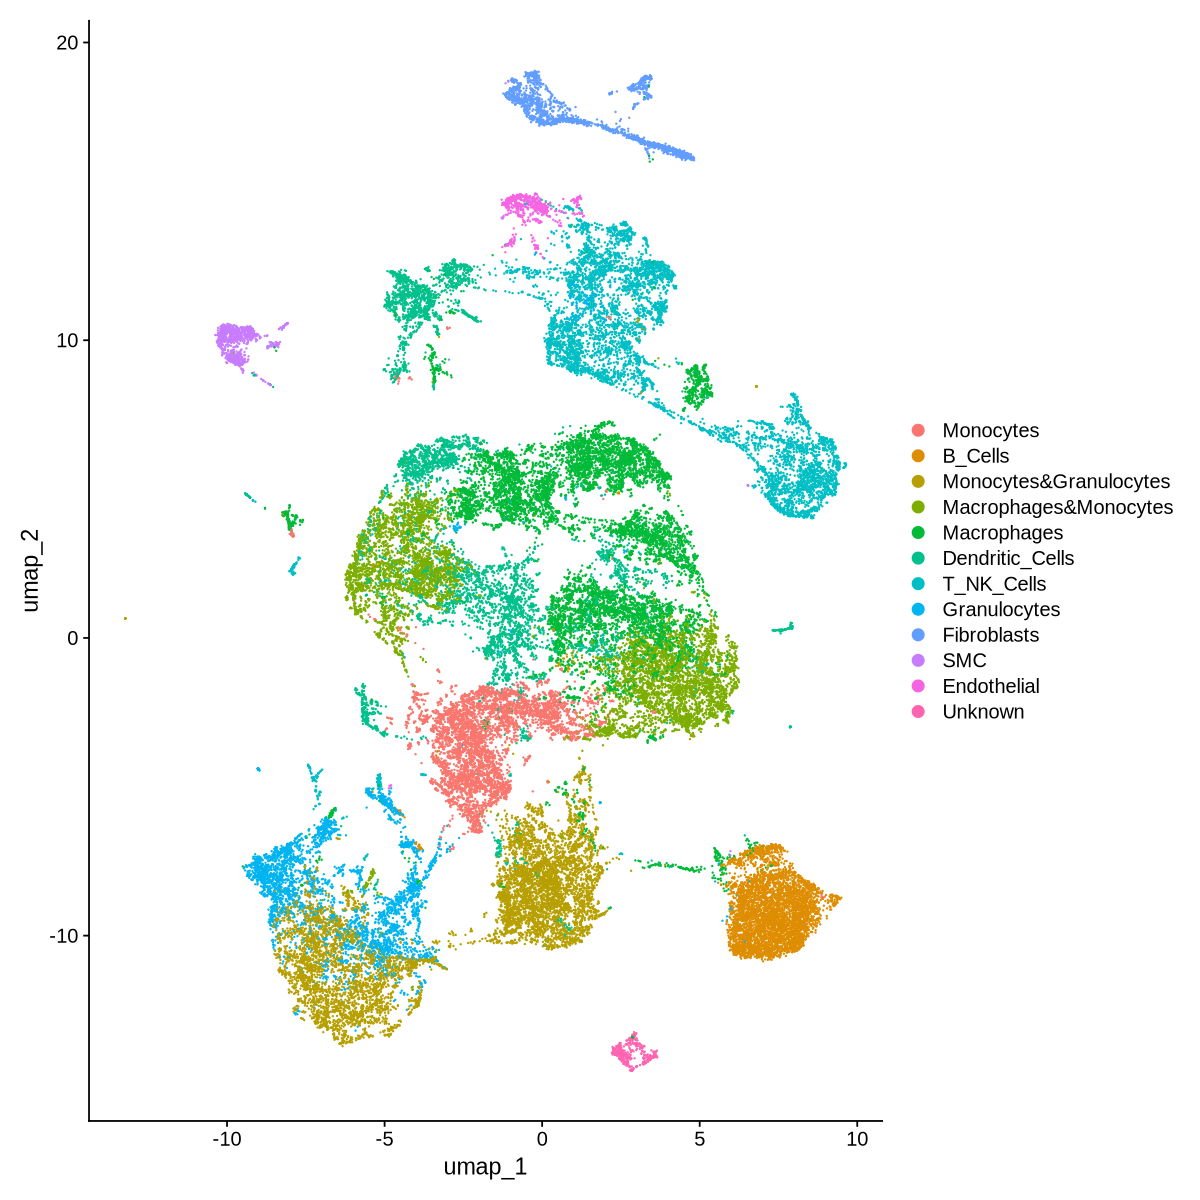

In [4]:
options(repr.plot.height = 10, repr.plot.width = 10)
DimPlot(Clusters, reduction = "umap",label.size = 5, label.color = "black", label = 'FALSE')

In [5]:
Clusters$celltype <- Idents(Clusters)

In [6]:
Clusters <- SetIdent(Clusters, value =Clusters$celltype )

In [7]:
table(Clusters@meta.data$celltype)


             Monocytes                B_Cells Monocytes&Granulocytes 
                  5225                   4693                   8137 
 Macrophages&Monocytes            Macrophages        Dendritic_Cells 
                  7524                  10581                   6180 
            T_NK_Cells           Granulocytes            Fibroblasts 
                  6782                   4145                   1822 
                   SMC            Endothelial                Unknown 
                   957                    705                    431 

In [8]:
Clusters$celltype_orig.ident <- paste(Clusters$orig.ident, sep = '_', Idents(Clusters))

In [9]:
Idents(Clusters)<- Clusters$celltype_orig.ident

In [10]:
levels(Clusters)

[1] "Sham_1_Unknown"                     "Sham_1_Monocytes"                  
  [3] "Sham_1_Dendritic_Cells"             "Sham_1_Macrophages"                
  [5] "Sham_1_Fibroblasts"                 "Sham_1_T_NK_Cells"                 
  [7] "Sham_1_Monocytes&Granulocytes"      "Sham_1_Granulocytes"               
  [9] "Sham_1_Macrophages&Monocytes"       "Sham_1_Endothelial"                
 [11] "Sham_1_B_Cells"                     "Sham_1_SMC"                        
 [13] "Sham_2_Unknown"                     "Sham_2_Monocytes"                  
 [15] "Sham_2_Dendritic_Cells"             "Sham_2_Fibroblasts"                
 [17] "Sham_2_T_NK_Cells"                  "Sham_2_Monocytes&Granulocytes"     
 [19] "Sham_2_Macrophages&Monocytes"       "Sham_2_Granulocytes"               
 [21] "Sham_2_Macrophages"                 "Sham_2_Endothelial"                
 [23] "Sham_2_B_Cells"                     "Sham_2_SMC"                        
 [25] "Sham_3_Unknown"                     "Sham_3_Fibroblasts"                
 [27] "Sham_3_Monocytes"                   "Sham_3_Dendritic_Cells"            
 [29] "Sham_3_T_NK_Cells"                  "Sham_3_Monocytes&Granulocytes"     
 [31] "Sham_3_Macrophages"                 "Sham_3_Macrophages&Monocytes"      
 [33] "Sham_3_Granulocytes"                "Sham_3_Endothelial"                
 [35] "Sham_3_B_Cells"                     "Sham_3_SMC"                        
 [37] "Sham_4_Unknown"                     "Sham_4_Fibroblasts"                
 [39] "Sham_4_Monocytes"                   "Sham_4_Dendritic_Cells"            
 [41] "Sham_4_T_NK_Cells"                  "Sham_4_Monocytes&Granulocytes"     
 [43] "Sham_4_Granulocytes"                "Sham_4_Macrophages&Monocytes"      
 [45] "Sham_4_Macrophages"                 "Sham_4_Endothelial"                
 [47] "Sham_4_B_Cells"                     "Sham_4_SMC"                        
 [49] "MI_Day_3_1_Macrophages"             "MI_Day_3_1_Dendritic_Cells"        
 [51] "MI_Day_3_1_Macrophages&Monocytes"   "MI_Day_3_1_Fibroblasts"            
 [53] "MI_Day_3_1_Monocytes"               "MI_Day_3_1_Monocytes&Granulocytes" 
 [55] "MI_Day_3_1_Unknown"                 "MI_Day_3_1_Granulocytes"           
 [57] "MI_Day_3_1_T_NK_Cells"              "MI_Day_3_1_SMC"                    
 [59] "MI_Day_3_1_B_Cells"                 "MI_Day_3_1_Endothelial"            
 [61] "MI_Day_3_2_Dendritic_Cells"         "MI_Day_3_2_Macrophages"            
 [63] "MI_Day_3_2_Fibroblasts"             "MI_Day_3_2_Macrophages&Monocytes"  
 [65] "MI_Day_3_2_Monocytes&Granulocytes"  "MI_Day_3_2_Monocytes"              
 [67] "MI_Day_3_2_Unknown"                 "MI_Day_3_2_Granulocytes"           
 [69] "MI_Day_3_2_T_NK_Cells"              "MI_Day_3_2_B_Cells"                
 [71] "MI_Day_3_2_SMC"                     "MI_Day_3_2_Endothelial"            
 [73] "MI_Day_3_3_Macrophages"             "MI_Day_3_3_Dendritic_Cells"        
 [75] "MI_Day_3_3_Macrophages&Monocytes"   "MI_Day_3_3_Fibroblasts"            
 [77] "MI_Day_3_3_Monocytes&Granulocytes"  "MI_Day_3_3_Monocytes"              
 [79] "MI_Day_3_3_Granulocytes"            "MI_Day_3_3_Unknown"                
 [81] "MI_Day_3_3_T_NK_Cells"              "MI_Day_3_3_SMC"                    
 [83] "MI_Day_3_3_B_Cells"                 "MI_Day_3_3_Endothelial"            
 [85] "MI_Day_3_4_Macrophages"             "MI_Day_3_4_Dendritic_Cells"        
 [87] "MI_Day_3_4_Macrophages&Monocytes"   "MI_Day_3_4_Fibroblasts"            
 [89] "MI_Day_3_4_Monocytes"               "MI_Day_3_4_Monocytes&Granulocytes" 
 [91] "MI_Day_3_4_Granulocytes"            "MI_Day_3_4_T_NK_Cells"             
 [93] "MI_Day_3_4_Unknown"                 "MI_Day_3_4_SMC"                    
 [95] "MI_Day_3_4_B_Cells"                 "MI_Day_3_4_Endothelial"            
 [97] "MI_Day_7_1_Unknown"                 "MI_Day_7_1_Dendritic_Cells"        
 [99] "MI_Day_7_1_Fibroblasts"             "MI_Day_7_1_Macrophages"            
[1

In [11]:
table(Clusters$celltype_orig.ident)


               MI_Day_14_1_B_Cells        MI_Day_14_1_Dendritic_Cells 
                                69                                218 
           MI_Day_14_1_Endothelial            MI_Day_14_1_Fibroblasts 
                                48                                240 
          MI_Day_14_1_Granulocytes            MI_Day_14_1_Macrophages 
                               179                                283 
 MI_Day_14_1_Macrophages&Monocytes              MI_Day_14_1_Monocytes 
                               288                                315 
MI_Day_14_1_Monocytes&Granulocytes                    MI_Day_14_1_SMC 
                               241                                217 
            MI_Day_14_1_T_NK_Cells                MI_Day_14_1_Unknown 
                               430                                  7 
               MI_Day_14_2_B_Cells        MI_Day_14_2_Dendritic_Cells 
                                68                                218 
     

In [21]:
head(Clusters)

,orig.ident,nCount_RNA,nFeature_RNA,mito.percent,pANN_0.25_0.09_167,DF.classifications_0.25_0.09_167,pANN_0.25_0.08_168,DF.classifications_0.25_0.08_168,pANN_0.25_0.07_166,DF.classifications_0.25_0.07_166,⋯,pANN_0.25_0.27_208,DF.classifications_0.25_0.27_208,pANN_0.25_0.22_205,DF.classifications_0.25_0.22_205,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,celltype,celltype_orig.ident
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<fct>,<fct>,<fct>,<chr>
Sham_1_TACACGAAGGCCCTTG-1,Sham_1,34426,4043,0.7697670,0.2196970,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,7019,1167,23,23,Unknown,Sham_1_Unknown
Sham_1_GGATTACGTTTGTTGG-1,Sham_1,32480,2910,0.4402709,0.2121212,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,7686,665,23,23,Unknown,Sham_1_Unknown
Sham_1_CGCGGTAGTGATGTGG-1,Sham_1,30713,3345,1.0907433,0.2462121,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,7112,874,23,23,Unknown,Sham_1_Unknown
Sham_1_CTGTGCTGTCGAGATG-1,Sham_1,28111,3683,0.8039557,0.2272727,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,6935,1201,23,23,Unknown,Sham_1_Unknown
Sham_1_TCGCGTTTCGAGAACG-1,Sham_1,26991,2525,0.5816754,0.1893939,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,7359,672,23,23,Unknown,Sham_1_Unknown
Sham_1_AGCCTAAGTTCAGTAC-1,Sham_1,26290,2756,0.8482313,0.2424242,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,7256,746,23,23,Unknown,Sham_1_Unknown
Sham_1_TCGCGAGTCAGTTTGG-1,Sham_1,25973,4821,1.4053055,0.1856061,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,6141,2338,0,0,Monocytes,Sham_1_Monocytes
Sham_1_TGGCCAGAGACGACGT-1,Sham_1,25363,4780,2.6889564,0.2613636,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,6329,2302,16,16,Dendritic_Cells,Sham_1_Dendritic_Cells
Sham_1_AACCGCGAGTAGCCGA-1,Sham_1,24485,4919,2.0379824,0.3219697,Singlet,NA,NA,NA,NA,⋯,NA,NA,NA,NA,6144,2384,6,6,Macrophages,Sham_1_Macrophages


In [15]:
library(ggplot2)

In [28]:
celltype_counts <- table(Clusters$celltype_orig.ident)  # Count occurrences of each cell type
celltype_data <- as.data.frame(celltype_counts)  # Convert to data frame

# Rename the columns for clarity
colnames(celltype_data) <- c("celltype", "count")

# View the first few rows of the data frame
head(celltype_data)

,celltype,count
,<fct>,<int>
1,MI_Day_14_1_B_Cells,69
2,MI_Day_14_1_Dendritic_Cells,218
3,MI_Day_14_1_Endothelial,48
4,MI_Day_14_1_Fibroblasts,240
5,MI_Day_14_1_Granulocytes,54
6,MI_Day_14_1_Macrophages,283


In [34]:
celltype_data

celltype,count,proportion
<fct>,<int>,<dbl>
MI_Day_14_1_B_Cells,69,0.0012066734
MI_Day_14_1_Dendritic_Cells,218,0.0038123885
MI_Day_14_1_Endothelial,48,0.0008394250
MI_Day_14_1_Fibroblasts,240,0.0041971250
MI_Day_14_1_Granulocytes,54,0.0009443531
MI_Day_14_1_Macrophages,283,0.0049491099
MI_Day_14_1_Macrophages&Monocytes,288,0.0050365500
MI_Day_14_1_Monocytes,315,0.0055087265
MI_Day_14_1_Monocytes&Granulocytes,91,0.0015914099


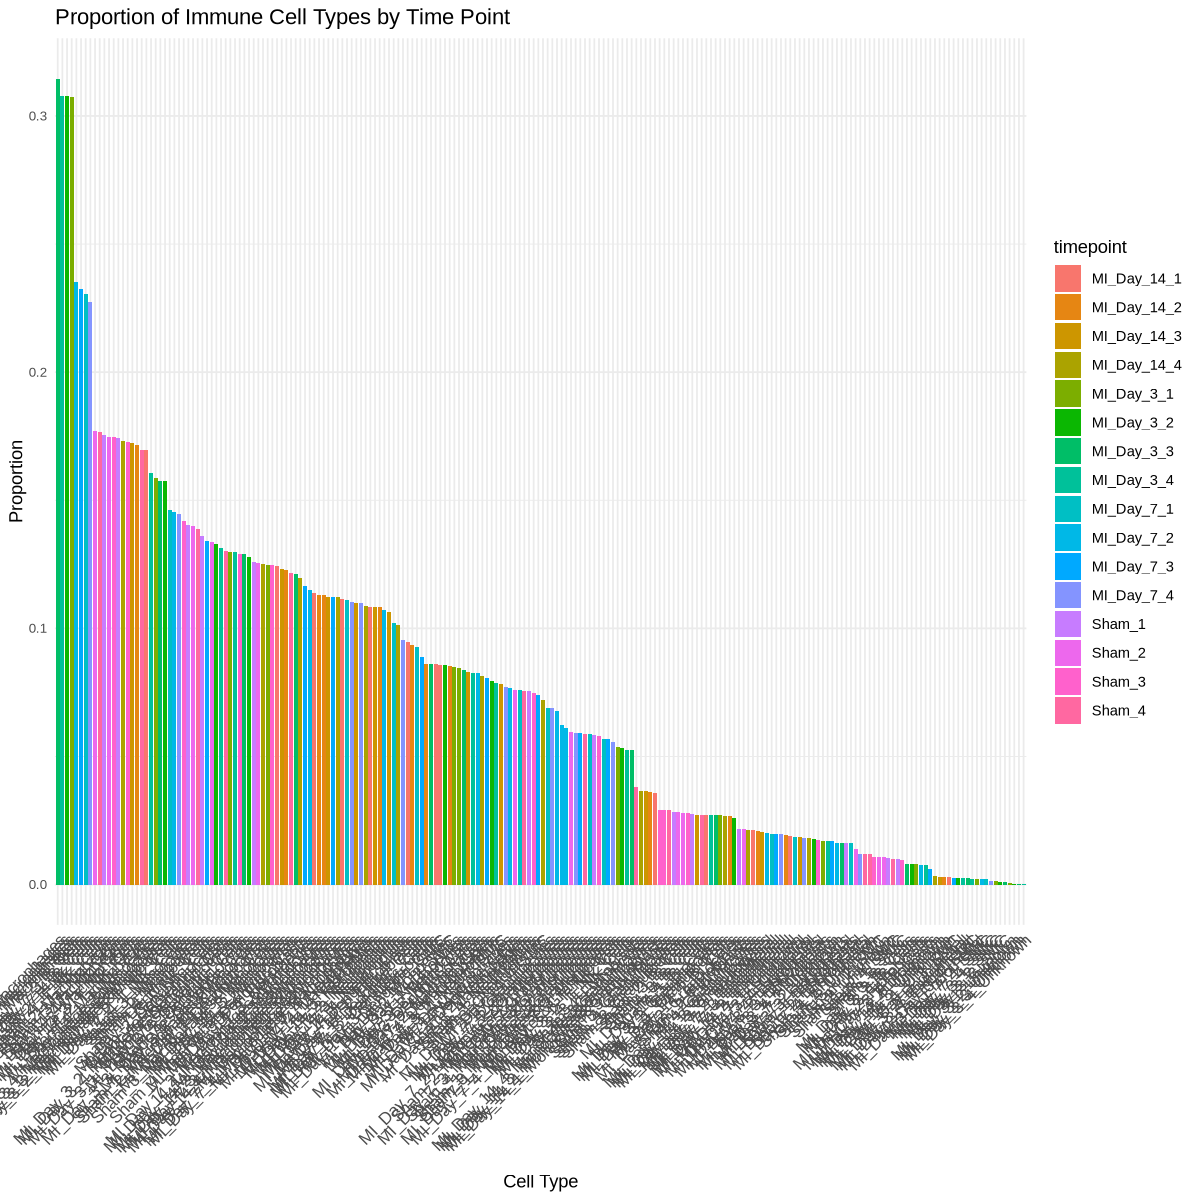

In [37]:
celltype_data <- data.frame(celltype = Clusters$celltype_orig.ident, timepoint = Clusters$orig.ident)

# Aggregate counts for each cell type by time point
aggregated_data <- celltype_data %>%
    group_by(timepoint, celltype) %>%
    summarize(count = n(), .groups = 'drop')  # Count instances

# Calculate total counts per time point
total_counts <- aggregated_data %>%
    group_by(timepoint) %>%
    summarize(total_count = sum(count), .groups = 'drop')

# Join to get total counts for proportion calculation
aggregated_data <- aggregated_data %>%
    left_join(total_counts, by = "timepoint") %>%
    mutate(proportion = count / total_count)  # Calculate proportion

# Create the proportion bar plot
ggplot(aggregated_data, aes(x = reorder(celltype, -proportion), y = proportion, fill = timepoint)) +
    geom_bar(stat = "identity", position = "dodge") +  # Use position = "dodge" for side-by-side bars
    labs(title = "Proportion of Immune Cell Types by Time Point", x = "Cell Type", y = "Proportion") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),  # Adjust text size and angle for clarity
          axis.text.y = element_text(size = 8))


In [25]:
KJ_Monocytes_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Monocytes','Sham_2_Monocytes','Sham_3_Monocytes','Sham_4_Monocytes'),
                                    ident.1 = c('MI_Day_3_1_Monocytes','MI_Day_3_2_Monocytes','MI_Day_3_3_Monocytes','MI_Day_3_4_Monocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Monocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Monocytes_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rps28,0.000000e+00,-1.484668,0.949,0.997,0.000000e+00
Rps27,0.000000e+00,-1.222583,0.988,1.000,0.000000e+00
H2-D1,0.000000e+00,-1.495010,0.988,1.000,0.000000e+00
Rps29,0.000000e+00,-1.594204,0.994,1.000,0.000000e+00
B2m,0.000000e+00,-1.463447,0.998,1.000,0.000000e+00
H2-K1,7.102767e-283,-1.487167,0.882,0.996,1.329283e-278


In [26]:
KJ_Monocytes_SEG_D3<-subset(KJ_Monocytes_DEG_D3, p_val_adj<0.05)

In [27]:
write.csv(KJ_Monocytes_SEG_D3,"KJ_Monocytes_SEG_D3.csv")

In [28]:
write.csv(KJ_Monocytes_DEG_D3, 'KJ_Monocytes_DEG_D3.csv')

In [29]:
KJ_Monocytes_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Monocytes','Sham_2_Monocytes','Sham_3_Monocytes','Sham_4_Monocytes'),
                                    ident.1 = c('MI_Day_7_1_Monocytes','MI_Day_7_2_Monocytes','MI_Day_7_3_Monocytes','MI_Day_7_4_Monocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Monocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Monocytes_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Plac8,2.722474e-106,1.3154992,0.959,0.668,5.095110e-102
Ly6c2,5.508743e-62,1.9377741,0.620,0.295,1.030961e-57
Cd74,8.547010e-57,-0.3484975,0.993,0.997,1.599573e-52
H2-Eb1,1.002768e-54,-0.4197839,0.991,0.993,1.876681e-50
Saa3,2.430008e-54,1.9116277,0.607,0.266,4.547760e-50
Hspa8,2.870524e-54,0.6405993,0.991,0.952,5.372185e-50


In [30]:
KJ_Monocytes_SEG_D7<-subset(KJ_Monocytes_DEG_D7, p_val_adj<0.05)

In [31]:
write.csv(KJ_Monocytes_SEG_D7,"KJ_Monocytes_SEG_D7.csv")

In [32]:
write.csv(KJ_Monocytes_DEG_D7, 'KJ_Monocytes_DEG_D7.csv')

In [33]:
KJ_Monocytes_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Monocytes','Sham_2_Monocytes','Sham_3_Monocytes','Sham_4_Monocytes'),
                                    ident.1 = c('MI_Day_14_1_Monocytes','MI_Day_14_2_Monocytes','MI_Day_14_3_Monocytes','MI_Day_14_4_Monocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Monocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Monocytes_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tmsb10,1.590664e-181,-1.588847,0.813,0.981,2.976927e-177
Prdx5,5.049286e-169,-2.253560,0.629,0.894,9.449740e-165
Gbp2,4.494068e-142,-3.563088,0.127,0.601,8.410648e-138
Ly6i,2.519120e-140,-3.775894,0.078,0.543,4.714533e-136
AW112010,1.211305e-126,-2.697653,0.385,0.758,2.266958e-122
Psme2,2.201201e-124,-1.534904,0.607,0.883,4.119548e-120


In [34]:
KJ_Monocytes_SEG_D14<-subset(KJ_Monocytes_DEG_D14, p_val_adj<0.05)

In [35]:
write.csv(KJ_Monocytes_SEG_D14, 'KJ_Monocytes_SEG_D14.csv')

In [36]:
write.csv(KJ_Monocytes_DEG_D14, 'KJ_Monocytes_DEG_D14.csv')

In [53]:
KJ_T_NK_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_T_NK_Cells','Sham_2_T_NK_Cells','Sham_3_T_NK_Cells','Sham_4_T_NK_Cells'),
                                    ident.1 = c('MI_Day_3_1_T_NK_Cells','MI_Day_3_2_T_NK_Cells','MI_Day_3_3_T_NK_Cells','MI_Day_3_4_T_NK_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='T_NK_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_T_NK_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Apoe,0.000000e+00,3.806277,0.880,0.067,0.000000e+00
Tmsb10,0.000000e+00,-1.478038,0.994,1.000,0.000000e+00
Rpl39,4.332334e-295,-1.413638,0.976,1.000,8.107963e-291
Lyz2,1.482966e-282,3.040338,0.847,0.110,2.775371e-278
Ccl6,8.537465e-281,4.627287,0.729,0.038,1.597787e-276
Rps27,7.695496e-278,-1.258115,1.000,1.000,1.440212e-273


In [54]:
write.csv(KJ_T_NK_DEG_D3, 'KJ_T_NK_DEG_D3.csv')

In [55]:
KJ_T_NK_SEG_D3<-subset(KJ_T_NK_DEG_D3, p_val_adj<0.05)

In [56]:
write.csv(KJ_T_NK_SEG_D3, 'KJ_T_NK_SEG_D3.csv')

In [49]:
KJ_T_NK_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_T_NK_Cells','Sham_2_T_NK_Cells','Sham_3_T_NK_Cells','Sham_4_T_NK_Cells'),
                                    ident.1 = c('MI_Day_7_1_T_NK_Cells','MI_Day_7_2_T_NK_Cells','MI_Day_7_3_T_NK_Cells','MI_Day_7_4_T_NK_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='T_NK_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_T_NK_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ndfip1,9.859548e-80,-0.8103336,0.727,0.884,1.845214e-75
Cd52,3.566700e-70,-0.4816225,0.987,0.996,6.675080e-66
Rps27a,3.371261e-65,0.3468262,1.000,0.997,6.309315e-61
Ubb,2.518815e-64,-0.3467190,0.994,1.000,4.713962e-60
Rpl23,2.075916e-62,0.3248789,0.999,1.000,3.885076e-58
Septin1,5.437334e-62,-0.6889938,0.686,0.855,1.017597e-57


In [50]:
write.csv(KJ_T_NK_DEG_D7, 'KJ_T_NK_DEG_D7.csv')

In [51]:
KJ_T_NK_SEG_D7<-subset(KJ_T_NK_DEG_D7, p_val_adj<0.05)

In [52]:
write.csv(KJ_T_NK_SEG_D7, 'KJ_T_NK_SEG_D7.csv')

In [45]:
KJ_T_NK_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_T_NK_Cells','Sham_2_T_NK_Cells','Sham_3_T_NK_Cells','Sham_4_T_NK_Cells'),
                                    ident.1 = c('MI_Day_14_1_T_NK_Cells','MI_Day_14_2_T_NK_Cells','MI_Day_14_3_T_NK_Cells','MI_Day_14_4_T_NK_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='T_NK_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_T_NK_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tmsb10,3.312267e-180,-0.7131112,0.999,1.000,6.198908e-176
Cd52,9.054929e-130,-0.7381568,0.989,0.996,1.694630e-125
Gimap4,6.727506e-106,-0.8938662,0.763,0.918,1.259053e-101
Ms4a4b,1.029997e-91,-0.8218844,0.818,0.954,1.927640e-87
Pfn1,3.111826e-82,-0.4753837,0.998,1.000,5.823783e-78
Apoe,4.319947e-81,2.7240878,0.353,0.067,8.084780e-77


In [43]:
write.csv(KJ_T_NK_DEG_D14, 'KJ_T_NK_DEG_D14.csv')

In [47]:
KJ_T_NK_SEG_D14<-subset(KJ_T_NK_DEG_D14, p_val_adj<0.05)

In [48]:
write.csv(KJ_T_NK_SEG_D14, 'KJ_T_NK_SEG_D14.csv')

In [57]:
KJ_Macrophages_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Macrophages','Sham_2_Macrophages','Sham_3_Macrophages','Sham_4_Macrophages'),
                                    ident.1 = c('MI_Day_3_1_Macrophages','MI_Day_3_2_Macrophages','MI_Day_3_3_Macrophages','MI_Day_3_4_Macrophages'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Macrophages',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Macrophages_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Spp1,0,3.200691,0.959,0.338,0
AW112010,0,-5.820608,0.087,0.666,0
Cybb,0,-2.273783,0.358,0.837,0
H2-Ab1,0,-4.130720,0.179,0.647,0
H2-Q7,0,-3.769056,0.061,0.500,0
Ndufb1,0,-1.933261,0.513,0.916,0


In [58]:
KJ_Macrophages_SEG_D3<-subset(KJ_Macrophages_DEG_D3,p_val_adj<0.05)

In [59]:
write.csv(KJ_Macrophages_SEG_D3, 'KJ_Macrophages_SEG_D3.csv')

In [60]:
write.csv(KJ_Macrophages_DEG_D3, 'KJ_Macrophages_DEG_D3.csv')

In [61]:
KJ_Macrophages_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Macrophages','Sham_2_Macrophages','Sham_3_Macrophages','Sham_4_Macrophages'),
                                    ident.1 = c('MI_Day_7_1_Macrophages','MI_Day_7_2_Macrophages','MI_Day_7_3_Macrophages','MI_Day_7_4_Macrophages'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Macrophages',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Macrophages_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Saa3,9.419905e-128,3.337265,0.862,0.592,1.762935e-123
Igkc,3.999629e-56,1.439588,0.468,0.185,7.485306e-52
Lcn2,2.597551e-53,3.227222,0.303,0.082,4.861316e-49
Hp,8.141836e-52,2.122772,0.512,0.262,1.523745e-47
Igfbp4,9.194269e-48,-3.123543,0.030,0.208,1.720708e-43
Pf4,1.698859e-42,-1.468378,0.402,0.621,3.179414e-38


In [62]:
KJ_Macrophages_SEG_D7<-subset(KJ_Macrophages_DEG_D7,p_val_adj<0.05)

In [63]:
write.csv(KJ_Macrophages_SEG_D7, 'KJ_Macrophages_SEG_D7.csv')

In [64]:
write.csv(KJ_Macrophages_DEG_D7, 'KJ_Macrophages_DEG_D7.csv')

In [65]:
KJ_Macrophages_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Macrophages','Sham_2_Macrophages','Sham_3_Macrophages','Sham_4_Macrophages'),
                                    ident.1 = c('MI_Day_14_1_Macrophages','MI_Day_14_2_Macrophages','MI_Day_14_3_Macrophages','MI_Day_14_4_Macrophages'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Macrophages',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Macrophages_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AW112010,1.846839e-128,-4.1510767,0.245,0.666,3.456359e-124
Tmsb10,1.364217e-122,-1.5469785,0.699,0.927,2.553133e-118
Ifi27l2a,1.013671e-94,1.3499819,0.886,0.551,1.897085e-90
Prdx5,1.750347e-91,-1.2189040,0.808,0.937,3.275775e-87
Nos2,2.868366e-82,-5.4193882,0.022,0.321,5.368148e-78
Cst3,4.649984e-78,0.9212501,0.985,0.927,8.702446e-74


In [66]:
KJ_Macrophages_SEG_D14<-subset(KJ_Macrophages_DEG_D14, p_val_adj<0.05)

In [67]:
write.csv(KJ_Macrophages_SEG_D14, 'KJ_Macrophages_SEG_D14.csv')

In [68]:
write.csv(KJ_Macrophages_DEG_D14, 'KJ_Macrophages_DEG_D14.csv')

In [69]:
KJ_Dendritic_Cells_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Dendritic_Cells','Sham_2_Dendritic_Cells','Sham_3_Dendritic_Cells','Sham_4_Dendritic_Cells'),
                                    ident.1 = c('MI_Day_3_1_Dendritic_Cells','MI_Day_3_2_Dendritic_Cells','MI_Day_3_3_Dendritic_Cells','MI_Day_3_4_Dendritic_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Dendritic_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Dendritic_Cells_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Spp1,0,5.578991,0.899,0.202,0
Pf4,0,4.134071,0.901,0.315,0
H2-K1,0,-2.166957,0.744,0.987,0
Rps27,0,-1.848912,0.960,1.000,0
Rps28,0,-1.738215,0.969,0.994,0
Ftl1,0,1.842517,1.000,0.980,0


In [1]:
KJ_Dendritic_Cells_SEG_D3<-subset(KJ_Dendritic_Cells_DEG_D3, p_val_adj<0.05)

ERROR: Error in eval(expr, envir, enclos): object 'KJ_Dendritic_Cells_DEG_D3' not found


In [71]:
write.csv(KJ_Dendritic_Cells_SEG_D3, 'KJ_Dendritic_Cells_SEG_D3.csv')

In [72]:
write.csv(KJ_Dendritic_Cells_DEG_D3, 'KJ_Dendritic_Cells_DEG_D3.csv')

In [73]:
KJ_Dendritic_Cells_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Dendritic_Cells','Sham_2_Dendritic_Cells','Sham_3_Dendritic_Cells','Sham_4_Dendritic_Cells'),
                                    ident.1 = c('MI_Day_7_1_Dendritic_Cells','MI_Day_7_2_Dendritic_Cells','MI_Day_7_3_Dendritic_Cells','MI_Day_7_4_Dendritic_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Dendritic_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Dendritic_Cells_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hspa8,1.633030e-88,0.7859712,0.979,0.901,3.056215e-84
Plac8,1.795451e-70,1.3356096,0.673,0.317,3.360187e-66
Ly6a,3.185570e-64,1.3421128,0.760,0.490,5.961795e-60
Fn1,4.987589e-62,-1.8114825,0.461,0.683,9.334272e-58
AW112010,1.531632e-59,0.7316517,0.871,0.590,2.866449e-55
Ly6e,2.638424e-53,0.7508737,0.927,0.839,4.937810e-49


In [74]:
KJ_Dendritic_Cells_SEG_D7<-subset(KJ_Dendritic_Cells_DEG_D7, p_val_adj<0.05)

In [75]:
write.csv(KJ_Dendritic_Cells_SEG_D7, 'KJ_Dendritic_Cells_SEG_D7.csv')

In [76]:
write.csv(KJ_Dendritic_Cells_DEG_D7, 'KJ_Dendritic_Cells_DEG_D7.csv')

In [77]:
KJ_Dendritic_Cells_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Dendritic_Cells','Sham_2_Dendritic_Cells','Sham_3_Dendritic_Cells','Sham_4_Dendritic_Cells'),
                                    ident.1 = c('MI_Day_14_1_Dendritic_Cells','MI_Day_14_2_Dendritic_Cells','MI_Day_14_3_Dendritic_Cells','MI_Day_14_4_Dendritic_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Dendritic_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Dendritic_Cells_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tmsb10,6.570797e-90,-1.2047790,0.875,0.987,1.229725e-85
Rps29,5.892942e-64,-0.5434809,0.995,1.000,1.102864e-59
AW112010,3.604689e-58,-2.3781638,0.251,0.590,6.746175e-54
Acod1,1.490381e-54,-2.9064714,0.087,0.390,2.789248e-50
Ly6a,2.334503e-49,-1.7467725,0.178,0.490,4.369022e-45
Rps28,2.288493e-47,-0.4792035,0.993,0.994,4.282915e-43


In [78]:
KJ_Dendritic_Cells_SEG_D14<-subset(KJ_Dendritic_Cells_DEG_D14, p_val_adj<0.05)

In [79]:
write.csv(KJ_Dendritic_Cells_SEG_D14, 'KJ_Dendritic_Cells_SEG_D14.csv')

In [80]:
write.csv(KJ_Dendritic_Cells_DEG_D14, 'KJ_Dendritic_Cells_DEG_D14.csv')

In [81]:
KJ_B_Cell_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_B_Cells','Sham_2_B_Cells','Sham_3_B_Cells','Sham_4_B_Cells'),
                                    ident.1 = c('MI_Day_3_1_B_Cells','MI_Day_3_2_B_Cells','MI_Day_3_3_B_Cells','MI_Day_3_4_B_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='B_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_B_Cell_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lgals3,1.117330e-72,5.419056,0.977,0.071,2.091082e-68
Ccl9,1.256613e-69,8.247054,0.885,0.000,2.351751e-65
Alox5ap,7.185708e-69,5.323769,0.931,0.031,1.344805e-64
Ccl6,9.223143e-69,6.686340,0.914,0.027,1.726111e-64
Ctsd,1.128089e-67,5.053711,0.931,0.062,2.111219e-63
Lgmn,2.395213e-65,5.079905,0.914,0.027,4.482641e-61


In [82]:
KJ_B_Cell_SEG_D3<-subset(KJ_B_Cell_DEG_D3, p_val_adj<0.05)

In [83]:
write.csv(KJ_B_Cell_SEG_D3, 'KJ_B_Cell_SEG_D3.csv')

In [84]:
write.csv(KJ_B_Cell_DEG_D3, 'KJ_B_Cell_DEG_D3.csv')

In [85]:
KJ_B_Cell_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_B_Cells','Sham_2_B_Cells','Sham_3_B_Cells','Sham_4_B_Cells'),
                                    ident.1 = c('MI_Day_7_1_B_Cells','MI_Day_7_2_B_Cells','MI_Day_7_3_B_Cells','MI_Day_7_4_B_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='B_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_B_Cell_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Egr1,7.576846e-100,-4.0668068,0.014,0.250,1.418007e-95
Fos,2.171551e-86,-3.0678798,0.084,0.487,4.064058e-82
Ldlr,1.456805e-71,-5.7513049,0.001,0.103,2.726410e-67
Ccl5,1.433664e-61,-4.8537522,0.011,0.170,2.683102e-57
Cd74,6.583510e-49,-0.3945763,1.000,1.000,1.232104e-44
Saa3,6.013579e-47,7.1062873,0.494,0.000,1.125441e-42


In [86]:
KJ_B_Cell_SEG_D7<-subset(KJ_B_Cell_DEG_D7, p_val_adj<0.05)

In [87]:
write.csv(KJ_B_Cell_SEG_D7, 'KJ_B_Cell_SEG_D7.csv')

In [88]:
write.csv(KJ_B_Cell_DEG_D7, 'KJ_B_Cell_DEG_D7.csv')

In [89]:
KJ_B_Cell_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_B_Cells','Sham_2_B_Cells','Sham_3_B_Cells','Sham_4_B_Cells'),
                                    ident.1 = c('MI_Day_14_1_B_Cells','MI_Day_14_2_B_Cells','MI_Day_14_3_B_Cells','MI_Day_14_4_B_Cells'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='B_Cells',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_B_Cell_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rps29,2.793563e-37,-0.6472716,1.000,1.00,5.228153e-33
Rps28,1.318833e-29,-0.5967936,1.000,1.00,2.468196e-25
Apoe,4.477016e-28,1.8563065,0.747,0.33,8.378736e-24
Rps27,1.097476e-24,-0.4554240,1.000,1.00,2.053926e-20
Rpl37,2.730119e-23,-0.4946893,1.000,1.00,5.109419e-19
Rpl35a,6.174387e-19,-0.3398333,1.000,1.00,1.155537e-14


In [90]:
KJ_B_Cell_SEG_D14<-subset(KJ_B_Cell_DEG_D14, p_val_adj<0.05)

In [91]:
write.csv(KJ_B_Cell_SEG_D14, 'KJ_B_Cell_SEG_D14.csv')

In [92]:
write.csv(KJ_B_Cell_DEG_D14, 'KJ_B_Cell_DEG_D14.csv')

In [37]:
KJ_Monocytes_Granulocytes_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Monocytes&Granulocytes','Sham_2_Monocytes&Granulocytes','Sham_3_Monocytes&Granulocytes','Sham_4_Monocytes&Granulocytes'),
                                    ident.1 = c('MI_Day_3_1_Monocytes&Granulocytes','MI_Day_3_2_Monocytes&Granulocytes','MI_Day_3_3_Monocytes&Granulocytes','MI_Day_3_4_Monocytes&Granulocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Monocytes&Granulocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Monocytes_Granulocytes_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rps29,2.641092e-251,-1.610696,0.991,1.000,4.942803e-247
Rps27,2.909288e-241,-1.510860,0.989,1.000,5.444733e-237
Gbp2,6.789280e-235,-4.884551,0.074,0.632,1.270614e-230
Rps28,8.593166e-225,-1.685517,0.943,1.000,1.608211e-220
Tmsb10,1.689799e-210,-1.704057,0.982,1.000,3.162458e-206
Rpl37a,6.737414e-201,-1.212776,0.996,1.000,1.260907e-196


In [38]:
KJ_Monocytes_Granulocytes_SEG_D3<-subset(KJ_Monocytes_Granulocytes_DEG_D3,p_val_adj<0.05 )

In [39]:
write.csv(KJ_Monocytes_Granulocytes_SEG_D3, 'KJ_Monocytes_Granulocytes_SEG_D3.csv')

In [40]:
write.csv(KJ_Monocytes_Granulocytes_DEG_D3, 'KJ_Monocytes_Granulocytes_DEG_D3.csv')

In [41]:
KJ_Monocytes_Granulocytes_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Monocytes&Granulocytes','Sham_2_Monocytes&Granulocytes','Sham_3_Monocytes&Granulocytes','Sham_4_Monocytes&Granulocytes'),
                                    ident.1 = c('MI_Day_7_1_Monocytes&Granulocytes','MI_Day_7_2_Monocytes&Granulocytes','MI_Day_7_3_Monocytes&Granulocytes','MI_Day_7_4_Monocytes&Granulocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Monocytes&Granulocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Monocytes_Granulocytes_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ly6c2,1.172846e-85,1.8049855,0.967,0.851,2.194981e-81
Plac8,1.766773e-62,0.6873770,1.000,0.981,3.306516e-58
Slfn4,1.412199e-57,2.9438522,0.564,0.145,2.642931e-53
Rps29,4.582816e-55,-0.4916052,1.000,1.000,8.576740e-51
Plin2,1.722860e-53,1.6571023,0.737,0.336,3.224332e-49
Ly6a2,2.569580e-47,1.8407227,0.715,0.374,4.808969e-43


In [42]:
KJ_Monocytes_Granulocytes_SEG_D7<-subset(KJ_Monocytes_Granulocytes_DEG_D7, p_val_adj<0.05)

In [43]:
write.csv(KJ_Monocytes_Granulocytes_SEG_D7, 'KJ_Monocytes_Granulocytes_SEG_D7.csv')

In [44]:
write.csv(KJ_Monocytes_Granulocytes_DEG_D7, 'KJ_Monocytes_Granulocytes_DEG_D7.csv')

In [45]:
KJ_Monocytes_Granulocytes_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Monocytes&Granulocytes','Sham_2_Monocytes&Granulocytes','Sham_3_Monocytes&Granulocytes','Sham_4_Monocytes&Granulocytes'),
                                    ident.1 = c('MI_Day_14_1_Monocytes&Granulocytes','MI_Day_14_2_Monocytes&Granulocytes','MI_Day_14_3_Monocytes&Granulocytes','MI_Day_14_4_Monocytes&Granulocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Monocytes&Granulocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Monocytes_Granulocytes_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Psmb8,5.904664e-59,-1.2114834,0.819,0.964,1.105058e-54
Rps29,1.760885e-56,-0.6833811,1.000,1.000,3.295495e-52
H2-DMa,3.900356e-49,-1.6946826,0.537,0.868,7.299515e-45
Cd74,3.672600e-44,-2.5666572,0.614,0.842,6.873271e-40
H2-Ab1,1.648092e-43,-2.9832889,0.337,0.706,3.084405e-39
Psme2,1.690158e-39,-1.2993817,0.638,0.891,3.163131e-35


In [46]:
KJ_Monocytes_Granulocytes_SEG_D14<-subset(KJ_Monocytes_Granulocytes_DEG_D14, p_val_adj<0.05)

In [47]:
write.csv(KJ_Monocytes_Granulocytes_SEG_D14, 'KJ_Monocytes_Granulocytes_SEG_D14.csv')

In [48]:
write.csv(KJ_Monocytes_Granulocytes_DEG_D14, 'KJ_Monocytes_Granulocytes_DEG_D14.csv')

In [130]:
KJ_Macrophages_Monocytes_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Macrophages&Monocytes','Sham_2_Macrophages&Monocytes','Sham_3_Macrophages&Monocytes','Sham_4_Macrophages&Monocytes'),
                                    ident.1 = c('MI_Day_3_1_Macrophages&Monocytes','MI_Day_3_2_Macrophages&Monocytes','MI_Day_3_3_Macrophages&Monocytes','MI_Day_3_4_Macrophages&Monocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Macrophages&Monocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Macrophages_Monocytes_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Spp1,0,4.202620,0.917,0.169,0
H2-Aa,0,-4.461925,0.141,0.804,0
H2-Eb1,0,-4.811769,0.107,0.744,0
H2-Ab1,0,-4.351907,0.209,0.833,0
Cd74,0,-3.785171,0.367,0.875,0
Lgals1,0,2.159541,0.990,0.714,0


In [131]:
KJ_Macrophages_Monocytes_SEG_D3<-subset(KJ_Macrophages_Monocytes_DEG_D3,p_val_adj<0.05 )

In [132]:
write.csv(KJ_Macrophages_Monocytes_SEG_D3,'KJ_Macrophages_Monocytes_SEG_D3.csv')

In [133]:
write.csv(KJ_Macrophages_Monocytes_DEG_D3, 'KJ_Macrophages_Monocytes_DEG_D3.csv')

In [134]:
KJ_Macrophages_Monocytes_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Macrophages&Monocytes','Sham_2_Macrophages&Monocytes','Sham_3_Macrophages&Monocytes','Sham_4_Macrophages&Monocytes'),
                                    ident.1 = c('MI_Day_7_1_Macrophages&Monocytes','MI_Day_7_2_Macrophages&Monocytes','MI_Day_7_3_Macrophages&Monocytes','MI_Day_7_4_Macrophages&Monocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Macrophages&Monocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Macrophages_Monocytes_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Saa3,2.901462e-187,1.8511180,0.989,0.825,5.430085e-183
Hp,1.244158e-145,2.2776432,0.794,0.356,2.328441e-141
Chil3,2.501934e-124,4.2560261,0.569,0.135,4.682369e-120
Hspa8,1.095828e-107,0.9014876,0.981,0.878,2.050842e-103
Gm56663,1.856819e-99,1.3646273,0.796,0.415,3.475037e-95
Plac8,2.347707e-96,1.8280758,0.674,0.293,4.393734e-92


In [135]:
KJ_Macrophages_Monocytes_SEG_D7<-subset(KJ_Macrophages_Monocytes_DEG_D7,p_val_adj<0.05 )

In [142]:
write.csv(KJ_Macrophages_Monocytes_SEG_D7,'KJ_Macrophages_Monocytes_SEG_D7.csv')

In [137]:
write.csv(KJ_Macrophages_Monocytes_DEG_D7, 'KJ_Macrophages_Monocytes_DEG_D7.csv')

In [138]:
KJ_Macrophages_Monocytes_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Macrophages&Monocytes','Sham_2_Macrophages&Monocytes','Sham_3_Macrophages&Monocytes','Sham_4_Macrophages&Monocytes'),
                                    ident.1 = c('MI_Day_14_1_Macrophages&Monocytes','MI_Day_14_2_Macrophages&Monocytes','MI_Day_14_3_Macrophages&Monocytes','MI_Day_14_4_Macrophages&Monocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Macrophages&Monocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Macrophages_Monocytes_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tmsb10,2.152044e-155,-2.1792482,0.608,0.920,4.027551e-151
Rps28,2.736769e-94,-0.7029593,0.993,1.000,5.121863e-90
Rps29,5.696458e-94,-0.6011276,1.000,1.000,1.066092e-89
AW112010,9.273318e-92,-3.3950209,0.344,0.677,1.735501e-87
Ubb,9.515572e-89,0.7675517,0.990,0.965,1.780839e-84
Rpl41,7.191485e-85,-0.5579838,0.999,1.000,1.345886e-80


In [139]:
KJ_Macrophages_Monocytes_SEG_D14<-subset(KJ_Macrophages_Monocytes_DEG_D14,p_val_adj<0.05 )

In [140]:
write.csv(KJ_Macrophages_Monocytes_SEG_D14, 'KJ_Macrophages_Monocytes_SEG_D14.csv')

In [141]:
write.csv(KJ_Macrophages_Monocytes_DEG_D14, 'KJ_Macrophages_Monocytes_DEG_D14.csv')

In [20]:
KJ_Granulocytes_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Granulocytes','Sham_2_Granulocytes','Sham_3_Granulocytes','Sham_1_Granulocytes'),
                                    ident.1 = c('MI_Day_3_1_Granulocytes','MI_Day_3_2_Granulocytes','MI_Day_3_3_Granulocytes','MI_Day_3_4_Granulocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Granulocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Granulocytes_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B2m,1.497996e-122,-1.568863,1.000,1.000,2.803499e-118
Gbp2,2.607670e-119,-5.147272,0.054,0.568,4.880254e-115
H2-D1,6.131551e-106,-1.393148,0.992,1.000,1.147520e-101
H2-K1,9.784457e-100,-1.794800,0.828,0.980,1.831161e-95
AW112010,1.189233e-98,-3.587172,0.163,0.748,2.225650e-94
Cd274,2.984566e-96,-3.651248,0.207,0.734,5.585616e-92


In [50]:
KJ_Granulocytes_SEG_D3<-subset(KJ_Granulocytes_DEG_D3, p_val_adj<0.05)

In [51]:
write.csv(KJ_Granulocytes_SEG_D3,'KJ_Granulocytes_SEG_D3.csv')

In [52]:
write.csv(KJ_Granulocytes_DEG_D3, 'KJ_Granulocytes_DEG_D3.csv')

In [53]:
KJ_Granulocytes_DEG_D7 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Granulocytes','Sham_2_Granulocytes','Sham_3_Granulocytes','Sham_1_Granulocytes'),
                                    ident.1 = c('MI_Day_7_1_Granulocytes','MI_Day_7_2_Granulocytes','MI_Day_7_3_Granulocytes','MI_Day_7_4_Granulocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Granulocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Granulocytes_DEG_D7)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1qb,8.750572e-85,-6.242323,0.009,0.366,1.637670e-80
C1qa,2.592642e-66,-6.511754,0.005,0.274,4.852129e-62
C1qc,1.428101e-52,-6.701232,0.006,0.229,2.672691e-48
Gbp2,2.446973e-52,-2.784246,0.186,0.674,4.579510e-48
H2-D1,1.081762e-50,-1.152250,0.999,1.000,2.024518e-46
Ccl6,8.355416e-50,-3.476415,0.069,0.463,1.563716e-45


In [54]:
KJ_Granulocytes_SEG_D7<-subset(KJ_Granulocytes_DEG_D7, p_val_adj<0.05)

In [55]:
write.csv(KJ_Granulocytes_SEG_D7,'KJ_Granulocytes_SEG_D7.csv')

In [56]:
write.csv(KJ_Granulocytes_DEG_D7, 'KJ_Granulocytes_DEG_D7.csv')

In [57]:
KJ_Granulocytes_DEG_D14 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Granulocytes','Sham_2_Granulocytes','Sham_3_Granulocytes','Sham_1_Granulocytes'),
                                    ident.1 = c('MI_Day_14_1_Granulocytes','MI_Day_14_2_Granulocytes','MI_Day_14_3_Granulocytes','MI_Day_14_4_Granulocytes'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Granulocytes',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Granulocytes_DEG_D14)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd274,1.969205e-39,-4.392187,0.217,0.783,3.685366e-35
Fth1,4.661331e-35,-3.008415,1.000,1.000,8.723681e-31
Mif,4.756644e-35,-2.919368,0.500,0.909,8.902059e-31
Gbp2,1.836628e-34,-4.894462,0.108,0.674,3.437250e-30
Rps9,1.044731e-32,1.297789,1.000,0.989,1.955214e-28
Cstb,2.103209e-31,-2.447485,0.557,0.891,3.936156e-27


In [58]:
KJ_Granulocytes_SEG_D14<-subset(KJ_Granulocytes_DEG_D14, p_val_adj<0.05)

In [59]:
write.csv(KJ_Granulocytes_SEG_D14, 'KJ_Granulocytes_SEG_D14.csv')

In [60]:
write.csv(KJ_Granulocytes_DEG_D14, 'KJ_Granulocytes_DEG_D14.csv')

In [61]:
KJ_Neutrophil_DEG_D3 <- FindMarkers(Clusters,
                                    ident.2 = c('Sham_1_Neutrophils','Sham_2_Neutrophils','Sham_3_Neutrophils','Sham_4_Neutrophils'),
                                    ident.1 = c('MI_Day_3_1_Neutrophils','MI_Day_3_2_Neutrophils','MI_Day_3_3_Neutrophils','MI_Day_3_4_Neutrophils'),
                                    group.by = 'celltype_orig.ident',
                                    celltype ='Neutrophils',
                                    only.pos = FALSE,
                                    logfc.threshold = 0.25)
head(KJ_Neutrophil_DEG_D3)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B2m,6.180030e-210,-1.561767,1.000,1.000,1.156593e-205
Tgfbi,9.434110e-203,3.871893,0.884,0.100,1.765594e-198
Cd274,2.898567e-198,-3.915236,0.143,0.734,5.424668e-194
Alox5ap,2.401359e-193,2.041717,0.993,0.571,4.494144e-189
Apoe,1.511559e-186,2.551223,0.964,0.592,2.828884e-182
Arpc1b,7.561503e-181,1.564082,0.989,0.798,1.415135e-176


In [62]:
KJ_Neutrophil_SEG_D3<-subset(KJ_Neutrophil_DEG_D3, p_val_adj<0.05)